In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,classification_report

In [64]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')

In [65]:
df

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [66]:
df  = df.drop(columns=' Net Income Flag')

In [20]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [21]:
for i in df.columns:

    df[i] = df[i].fillna(df[i].mean())

In [67]:
from imblearn.under_sampling import RandomUnderSampler

In [68]:
X = df[df.columns[1:]]
y = df['Bankrupt?']

In [69]:
Xt, yt = RandomUnderSampler().fit_resample(X, y)

In [70]:
yt.value_counts()

0    220
1    220
Name: Bankrupt?, dtype: int64

In [71]:
under_sampled_df = pd.concat([Xt, yt], axis=1)

In [72]:
df = under_sampled_df

In [73]:
df

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
1761,0.478331,0.547918,0.530275,0.606733,0.606733,0.999007,0.797467,0.809383,0.303580,0.781632,...,0.805502,0.020027,0.624046,0.606731,0.840562,0.275932,0.026842,0.565388,0.087621,0
3883,0.601180,0.618295,0.641255,0.622580,0.622580,0.999282,0.797805,0.809662,0.303595,0.781940,...,0.844380,0.003349,0.622870,0.622577,0.842986,0.276833,0.026820,0.565293,0.055223,0
4848,0.514162,0.551461,0.560041,0.607309,0.607309,0.999038,0.797442,0.809359,0.303472,0.781621,...,0.805693,0.001059,0.623859,0.607304,0.840881,0.280490,0.026888,0.565582,0.026896,0
1124,0.479745,0.545683,0.532041,0.607035,0.607035,0.998983,0.797462,0.809376,0.303622,0.781608,...,0.804720,0.007593,0.624148,0.607035,0.840566,0.276704,0.026795,0.565178,0.058097,0
1105,0.448935,0.512429,0.499331,0.600996,0.601118,0.999013,0.797154,0.809089,0.303022,0.781309,...,0.781097,0.009891,0.613601,0.600993,0.838298,0.284975,0.026396,0.562155,0.019635,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,0.781254,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,0.015620,1
6640,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,0.780388,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,0.003946,1
6641,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,0.781340,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,0.011797,1
6642,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,0.780733,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,0.011777,1


In [74]:
X = df[df.columns[1:]]
y = df['Bankrupt?']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

### **Decision Tree**

[[16  0]
 [ 0 28]]


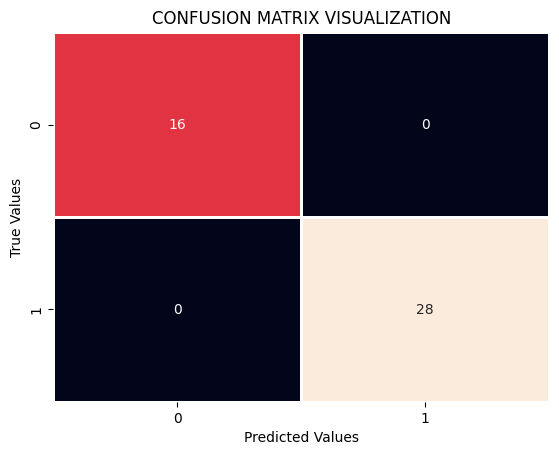

In [81]:
model1 = DecisionTreeClassifier()

model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)


conf = confusion_matrix(y_test,y_pred)
print(conf)
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,lw =2,cbar=False)
plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("CONFUSION MATRIX VISUALIZATION")
plt.savefig("Confusion_Matrix.pdf", dpi=300, format='pdf', bbox_inches='tight')
plt.show()

In [82]:
res = classification_report(y_test,y_pred)
print(res)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        28

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [84]:
logistic_reg = LogisticRegression(random_state=42)
logistic_reg.fit(X_train, y_train)

# Make predictions
y_pred = logistic_reg.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.66
Precision: 0.74
Recall: 0.71
F1 Score: 0.73
Confusion Matrix:
[[ 9  7]
 [ 8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.74      0.71      0.73        28

    accuracy                           0.66        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.66      0.66      0.66        44



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [86]:
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    XGBClassifier(),
    LGBMClassifier(),
    MLPClassifier()
]

In [87]:
# Iterate through models and evaluate their performance
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Print or store the evaluation metrics for each model
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("\n")

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model: LogisticRegression
Accuracy: 0.66
Precision: 0.74
Recall: 0.71
F1 Score: 0.73
ROC-AUC: 0.64
Confusion Matrix:
[[ 9  7]
 [ 8 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.56      0.55        16
           1       0.74      0.71      0.73        28

    accuracy                           0.66        44
   macro avg       0.64      0.64      0.64        44
weighted avg       0.66      0.66      0.66        44



Model: DecisionTreeClassifier
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC-AUC: 1.00
Confusion Matrix:
[[16  0]
 [ 0 28]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        28

    accuracy                           1.00        44
   macro avg       1.00      1.00      1.00        44
weighted avg       1.00      1.00      1.00        44



Model: RandomForestC

In [88]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
import warnings

# Filter out LightGBM warnings
warnings.filterwarnings("ignore")

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.


In [89]:
# Add these models to the list of models
models.extend([
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RidgeClassifier(),
    SGDClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    ExtraTreesClassifier(),
    HistGradientBoostingClassifier(),
    GaussianProcessClassifier(),
    MLPClassifier(max_iter=1000),
    VotingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ]),
    StackingClassifier(estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier()),
        ('lgbm', LGBMClassifier())
    ], final_estimator=LogisticRegression())
])



In [90]:

with open("warnings.log", "w"):
    warnings.filterwarnings("ignore", category=UserWarning)
    warnings.filterwarnings("ignore", category=FutureWarning)



[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 192, number of negative: 204
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11903
[LightGBM] [Info] Number of data points in the train set: 396, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.484848 -> initscore=-0.060625
[LightGBM] [Info] Start training from score -0.060625
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

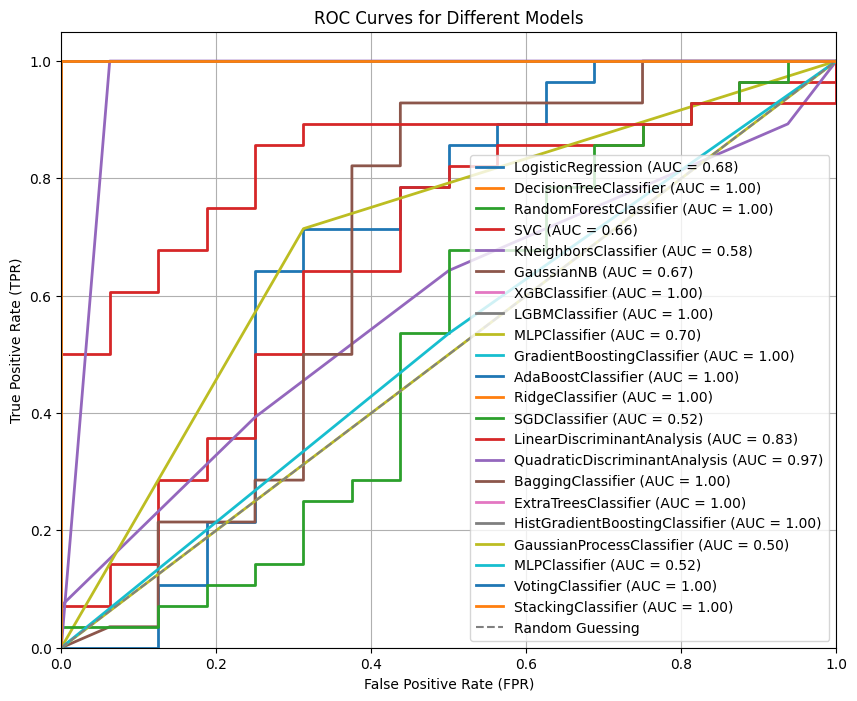

In [92]:
roc_data = {}

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))

for model in models:
    model_name = model.__class__.__name__

    # Fit the model
    model.fit(X_train, y_train)

    # Check if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        # Get predicted probabilities for positive class
        y_pred_prob = model.predict_proba(X_test)[:, 1]
    else:
        # For models without predict_proba, use decision_function or predict directly
        if hasattr(model, "decision_function"):
            y_pred_prob = model.decision_function(X_test)
        else:
            y_pred_prob = model.predict(X_test)

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Store ROC curve data
    roc_data[model_name] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the ROC curve for random guessing (chance)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Customize the plot
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig("ROC REPORT.pdf", dpi=300, format='pdf', bbox_inches='tight')
# Show the plot
plt.show()


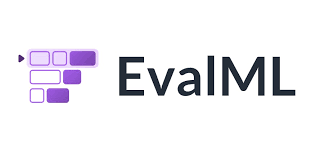

In [76]:
from IPython.display import Image, HTML, display
# Replace "image_url" with the URL of the image you want to display
image_url = "data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAUAAAACdCAMAAADymVHdAAABPlBMVEX///8lLTj//v////0kLjokLjglLTocJDEZJDAdKDMAChyZnJ/CxcdbYGW5u8AMGCbq7OxlaHETHSvt3P7s1/4hKTbh4uR4en6kYeOrbuCNUcvl0PaJTsRARkt8f4SRU9AAABOJjZI1PUVITVPoz/zz6f6yd+j59fqXVtgAAAC5g+3hwPju3/2BSbjy1/+zhePcufrOo/Dfz/AAABisaemqhM6dWeCOWcXvz/9TL3eycurFl+/UsfCnetAAESWhpamFRcD/9v+gaO6peuLvyv6bZtadYdqXa8PovfbasPZ5RK763/+VWurj2ujLlvC5sMIsAFlpUoeklrBNH3dBIGBSMXNBFG56ZI3W0Nh/Rqu+mdp4TKibdsCvi8vm3f61hteZTuv+/+6PSNXXv+XKtNh5O7OJS9mRZsKNYbS4oM+epu0OAAAN1klEQVR4nO2bi18axxbHZ2fZZUFgkQU0vngIQhTRRENM9YrWxjavtjfpw77SxN70tv//P3DPmZl9sisPQ5P7yfkmMTLsY/bHmTmPGRgjCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIKYF7r34xNF1/2n5wIdm3Tx01NGV8ScL979R7r6keKqdRMgrS5VjDn905WPi2fnvHNL+KcqIQrIz3u9ngN/fcqOg23lMv7u4v7eKrfwr88qvG7zD/0oHwa0HNSvV+6XPfXK5f4zaIGGcr/fF6IdwdugXBkbWq0j+BPF+dCP8s8jnafO273e0d7l58sBPt+698zpOfsX0Hx4eAgtl8dHoO0Xe48vLx9LHvp8eQIKdnQeHsa6ukH8lPrenkJ3/x931fd+Y/QJ8MwdMLbD7a92guw/GTxxnJ3n9/b33YY722B/F93BoAvUgBXBGrL7dKfcaoMn4uE7+N2ej4DcvYsKHG686siN4aTb3FxeTAq4c/msF5oDe+17W73y8bbf1t553u/v+/oF5AMBdx/0RwWcJxExJvhERo649efIX3RcC3yyBU7ECdI7+aznbH8NrqSvPEj/8sh50u3G6/fuBgFFKCn+6O4vt+l25OK6+m/sVUWoFnp9SwH1b7799wtlgftb6EZ6PuXy/rLj7B07jnIi/fLR4Mg5AfEC49fTb/csQcC5WWQ1hxQ6YU1uOIFPcMyUvHz16rtvmBLwmfM6ELCA/z05dMACe35La1kIKOSL6gdDuBU/B1aTuGXnC3dt4G6RS9NzL5r0gaFs8pCi6lrRPWV2RV8++v77H34811HAz3rhMQxNh2iBPcdTtDU4Kp8k6Rc7B4KDZ5v1bCx3Z+62pGBrKUPLFtWUkBe3qW+iZ4g5GlTuaAfivguygeXu4ssD4zYCvnr06NEP3zApYGgGdMogYFkMYc8EhYC1qIC7u8kC4rjJZzSBaZr4D39o+CM7c7clBduQAsoJdjEt7nI6TBCQsUYpZWpGquQJaMNLs7J+i1kGBXz14znG0ULAkIY3CRh0IJMKGGU+AmpGJ/ZozopZw5yDgN+9hDmkM6WAcfo9HSdgKsLpzN2WJAio9BllyTK09yyg/vLb71+gM5/WAmP0G2uBlVKE+qzdViQIqJWKsYO4mjVS711AfsWFo+z02lMIuBIzAY61wEx+IUJj1m4rEgRMlTZiBcxb719ApgqhMhPp9yIcbzu9exDdOKrG8Gz/ed/Z2e12Aw5YSfj0p92nP7dW21gzDPs0FNBAuxjG3V6kUpFoVuVHPNggjuPhMDhBQFOzw4GJqGOCWgb6sfcuIFMCOv3tw3thvh58BbHz8rbfsHzc7/f/dVZbOVs5Q3b9CfDdu1++wDhQj8apnoAJU1Ni58fGFklDWLMWoyeDgJuZeQrI2732s3vbe9tB9nbA+JyjY7/lSd9xXrd+/lcMv/72Rb/VOmdTCiiNKzzivBWF6JGRcxMFNLKjMXouq8xzLgLKemoELAc6vdevAxUGrA9i1VDRD9I6aq32YvL1MRYYU5lRLaEhrLvtgeOSBczkR+7TzMxVQMbP2+1IRRpDaZAQ/6hsTv7Wx5ykj/VToeSqhyPtLzp6kgUMVlLC3VFn+tMpZF05TMHGCriZNoBsLtQFnQ1BK3Bkm/MSUH64Xl3SK1u45RPdXaYLlC6ZO9hcRGl7SgEbi0jkraslbFxiSkCeW2qmT09Ps1ZzWAwcFidgaQHmOgOUCvYAetaswPRnLcEx8xBQPcy54w3OKD0OEuq85zlkx7nf64Cu40tIbhgD3Y4UU/Ff4SBtWdbBAnMb8Ix0yUqnTxtyPuXD5mm6InJAM2NnCjcJCBo1clmQSjstMG9q1aUBGtpBcbMyNwEZaw2WL5cTeP4719+2L9686b65vh5cd6+Rh/fZdAL6uCU8EMuEDCWzHmwt2KmUikU4qzbtiiHALFrT6guB42IE3AB3i4O16QdCkGhlKiCVtcTmKKDe7vaT3+Rb9xg7HgDLA0mt1h08FGNscgH90e65BdawQEBNuk3lN/IZaMFQBA4Z3s2YZgqEgnEJreAg6rlkATUTBLzKYrRiB8PORgknEbs4TwHZ6h2mv01YvND1nT3Glp8PBs+lfN0u/FZbazN97GKwJ2AkkFbzZVWEF1ZDPIRYty+KlqzUaTONWbNlnzabRhbmUtM0SjxJQMNIpTcY/JLCCc9XpVgSHYDMZ54Cti5Av0QRdvZ0/VIZ30AV9bvXvSkErOQbQarSY+vy3ZQm9UPRFkowXVWaMu2o1g0jk80XOmC2ufWMkQrY1qgFSgGrNhyVQr1U1zbgHc1MF/X5WuBW8nqQtMDLsH612lmb6SNeN4pXTMhYPiU5EPHcgo0C2jl3WY2to8cQj49XbtSzzZx8XtYxKjCKK66HTRBQZxtWykypSit+CAealG2uAuqtLT15QS0gYNdFCMgndiKadKQKP1DjJoa36UU3bqpi1c6sq3gFXgeyimEJhNFO1Xsxc2DKQgGLNjodUVPAT2TRwgEANv5RCBjQTwo4sQUGERanaFhYJ7aLKpLZKIGAaZVKRNaLqlkUMHslXycICBMBzAKaIRI6nGXreEcY+PwjELAb1O8WAopUQZ1YzYKAml2AGQQrLkYF6ymevn7sjouHWZgtTffNJAHhUMsAAcGR44s8hjcY1nwEFgjO15dvZWU6AVPNAIYvIDyhKdNXFDAncy7vzVD+20ELNG0VTCcIiLcc2sIE0VQhsNbMlDhnvgKuTiRgwACVgLPFgX79RQchTJiyYNbD1kUc0KWGl5UERjHnHRtjwbECwhliBUHUFDYxkIRIXYT8cw1jtpietFEEwxjGariiHlzUPOtNsJ8iNhMJABfIgH/Bx4JPA0I20ChQEZU3uBpu5JvpgyxEepMJWMii0zrNgQEKj5ybu4B66zPdLc6NIC3woTcHCgFrK+/a4zO5sQVVzEZKmOeu4zPh2EuBC/HqMPB/bqmehewY58bJBEQwoUNftFkxDS2TVznTfFO5crIW5xdPGHtwfd1dUWuatbW1tbOHbKSAP8o4ATHfrePIzKLZrcNzGyIodN8uNE8tmMRSYkEZQ+7JBMQCKjijQglVt68Ym7eAjO90Dz+7k8BgD6zw/Nfr67Mz/Idcn/11X6yATDAH3iggE+s9moidq7bwmP4D8aVsBdWrWCXbLsGbkwoIdxWL+Gi26I7nLiDuUnVWk2iL9J+/uB8AN3ZNsLVpvIDoRkBAzN4aFmaxDX9eyMOcaBqW3WwMc9ViB2LGSQUEswYBxUqwKFXMX0CeWEkQc6MwNr+cFy7B3sAEAuoYt4nsBN2JGMvqukPUyKg3ZLEGZ8tJBdTZEohtYhUM2/S5C4gKYRijqk3oOLgSNViy9kfsROqx8V5YFbWEH65iJQpmfrkQCXdrotdAwdSnNbmAjBXrBtgg/BVHJAkISd76iCPkY2f2mKd4G1iRxN6+jR2f029HjI0DeXApDtMtMfflISI0MU6WS0qi1gXR3KYqjU4pICSFcHDKKMkF/EQBVTX3Ns8oTzs/+X1ve09ycg6XOT958LvHA8kfU193vIBo+XiM0VzEI9PSMXEZYqeMzJI7LESpb9IhDDGlhQG6YantgFMIOIuCOt+72FG7yf/Y3wKvyx68cQuoMny+rq2dvfvPtBdOKqiGQTeCJRNwmQ33PPGEqZTRlA/FGV8sTeyFUYWFrGlWDtR9EwQECZuRfZ+d2QR0uh33y15gjZ/3WPvP54PuIJB61FYervz5MH7zWDJeLlyqRwhusOToRbDKYNhVT0BdDGF39uQFrRQJpLUbBYQRn77rTb2JAsItw/s+A+tW09Da8v0sZxdH+h/Xl37lQGi4BvHzu5kFNCK72wx/fyDXZVELBIGkwc/iIK4WDlxrLCwsWnbFxCpL0AKNG+ZAdyR6C1hKQDMyhOEi4V13uZm8cqgaw9lWi92/VqlbaD/ltAJi0b4yUs4ShDZYyrBNlU08hlmMRDQIo62MYWTSCxY8bVBAuEpR9RvrprKgmgDWAzFOCghojPYKq2UzDeEYAbvhL9SszSxgdGtl3AbLfAaDDs0IRxB5W+7LRG9gr1d5xjSC5SxNCiheLuIFgl54tC8gIGQ1AQFju5W74RI3XDxOwJgvJM0iYMmKpR44jLNCFtvsRuTj3zgoZUDWjGXbC9C9pVOrdOAKWJe79FVFI29bVtpeSuwI/l3HrmTdaTF3YKVHu3WQi99kPe5BYwWsjXwhZEoB0ZcuLCUQPI5z2Tayta/a2MyU0utLBbFVhg8bjQ1lItVhARh21H4SeZtEXy8EbIhj3FniKr5bV1M9oXf9eAFr0Q3l0ws4Yb4S+6GrCqWKo3W3YBm6pEoAAhXaWEa37SR2bLYwBivSuhfgbrX01YAF+ptRp/bCusjL4suMAbiXaYdamVvuURk513Uv0dLdPFNdQN7qxq5g/S2gT2z9c7Y4WoQx3N/+c7HK7uMEqGwv8I24aQX8VNBb2+JrRco2Llb1+2B93ZVaLbiffHon8ulQvmRufR4s8LCnQxy40u36m8kFT38hARM4vzj2tgP2j++cc/7ln7UV4UXO5J7y3Z92d5/+/aH7+bGi6+3jx+qb/HceH+MXPtq/fflfwV8+f89QKfs0iOiiJ623zeiiCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCIIgCOL/k/8BD+YXRU5K2V0AAAAASUVORK5CYII="

# Set the desired width (in pixels) for the image
image_width = 990  # Adjust this value as needed

# Create an HTML <img> element with the specified width
image_html = f'<img src="{image_url}" width="{image_width}px">'

# Display the HTML element
display(HTML(image_html))


In [79]:
!pip install evalml

SyntaxError: ignored

SyntaxError: ignored

In [8]:
import evalml

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [36]:
import pandas as pd

In [37]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data.csv')


# Extract the features (X) and target (y)
X = df.drop("Bankrupt?", axis=1)  # Assuming "Bankrupt?" is the target column
y = df["Bankrupt?"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type='binary')


In [38]:
X_train.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
5557,0.446400,0.480975,0.487767,0.607374,0.607497,0.998941,0.797153,0.809093,0.303169,0.781336,...,0.762124,0.000600,0.623910,0.607374,0.836488,0.283202,0.026665,0.564474,1,0.021593
4839,0.510213,0.568415,0.556400,0.607316,0.607295,0.999025,0.797792,0.809607,0.304110,0.781883,...,0.816127,0.003316,0.624539,0.607317,0.841214,0.276450,0.026800,0.565199,1,0.064953
6283,0.555989,0.587604,0.598747,0.610631,0.610631,0.999124,0.797564,0.809446,0.303504,0.781756,...,0.826592,0.002296,0.624415,0.610631,0.842167,0.278067,0.026833,0.565350,1,0.038828
4387,0.377614,0.423953,0.417421,0.596153,0.596521,0.998812,0.796982,0.808924,0.303142,0.781173,...,0.729441,0.002758,0.623922,0.596148,0.835453,0.278006,0.026768,0.565045,1,0.039345
6254,0.451129,0.501799,0.494405,0.607619,0.607619,0.999070,0.797280,0.809187,0.303122,0.781457,...,0.778362,0.002582,0.624549,0.607619,0.839168,0.275215,0.026791,0.565158,1,0.191443


Running the AutoML to select the best **algorithm**

In [39]:
evalml.problem_types.ProblemTypes.all_problem_types

[<ProblemTypes.BINARY: 'binary'>,
 <ProblemTypes.MULTICLASS: 'multiclass'>,
 <ProblemTypes.REGRESSION: 'regression'>,
 <ProblemTypes.TIME_SERIES_REGRESSION: 'time series regression'>,
 <ProblemTypes.TIME_SERIES_BINARY: 'time series binary'>,
 <ProblemTypes.TIME_SERIES_MULTICLASS: 'time series multiclass'>,
 <ProblemTypes.MULTISERIES_TIME_SERIES_REGRESSION: 'multiseries time series regression'>]

In [40]:
from evalml.automl import AutoMLSearch
automl = AutoMLSearch(X_train=X_train, y_train=y_train, problem_type='binary')
automl.search()

[LightGBM] [Info] Number of positive: 703, number of negative: 2814
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001371 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 3517, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199886 -> initscore=-1.387005
[LightGBM] [Info] Start training from score -1.387005
[LightGBM] [Info] Number of positive: 703, number of negative: 2815
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001345 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12240
[LightGBM] [Info] Number of data points in the train set: 3518, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.199829 -> initscore=-1.387361
[LightGBM] [Info] Start training from score -1.387361
[LightGBM] [

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 6.834762096405029,
  'Total time of batch': 6.957428455352783},
 2: {'LightGBM Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 4.913186073303223,
  'Extra Trees Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 6.1263744831085205,
  'Elastic Net Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 4.881009101867676,
  'XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer': 10.624629974365234,
  'Logistic Regression Classifier w/ Label Encoder + Imputer + Oversampler + Standard Scaler + Select Columns Transformer': 6.043295621871948,
  'Total time of batch': 33.205392837524414}}

In [41]:
automl.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,5,XGBoost Classifier w/ Label Encoder + Imputer ...,5,0.102902,0.102902,0.012516,91.151324,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.109716,0.109716,0.007144,90.565390,False,"{'Label Encoder': {'positive_label': None}, 'I..."
2,2,LightGBM Classifier w/ Label Encoder + Imputer...,2,0.128948,0.128948,0.019969,88.911617,False,"{'Label Encoder': {'positive_label': None}, 'I..."
3,3,Extra Trees Classifier w/ Label Encoder + Impu...,3,0.163343,0.163343,0.002944,85.953941,False,"{'Label Encoder': {'positive_label': None}, 'I..."
4,4,Elastic Net Classifier w/ Label Encoder + Impu...,4,0.173736,0.173736,0.013564,85.060264,False,"{'Label Encoder': {'positive_label': None}, 'I..."
5,6,Logistic Regression Classifier w/ Label Encode...,6,0.189530,0.189530,0.028255,83.702139,False,"{'Label Encoder': {'positive_label': None}, 'I..."
6,0,Mode Baseline Binary Classification Pipeline,0,1.162911,1.162911,0.011265,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [42]:
automl.best_pipeline

pipeline = BinaryClassificationPipeline(component_graph={'Label Encoder': ['Label Encoder', 'X', 'y'], 'Imputer': ['Imputer', 'X', 'Label Encoder.y'], 'Oversampler': ['Oversampler', 'Imputer.x', 'Label Encoder.y'], 'Select Columns Transformer': ['Select Columns Transformer', 'Oversampler.x', 'Oversampler.y'], 'XGBoost Classifier': ['XGBoost Classifier', 'Select Columns Transformer.x', 'Oversampler.y']}, parameters={'Label Encoder':{'positive_label': None}, 'Imputer':{'categorical_impute_strategy': 'most_frequent', 'numeric_impute_strategy': 'mean', 'boolean_impute_strategy': 'most_frequent', 'categorical_fill_value': None, 'numeric_fill_value': None, 'boolean_fill_value': None}, 'Oversampler':{'sampling_ratio': 0.25, 'k_neighbors_default': 5, 'n_jobs': -1, 'sampling_ratio_dict': None, 'k_neighbors': 5}, 'Select Columns Transformer':{'columns': [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciatio

In [43]:
best_pipeline=automl.best_pipeline

### Let's Check the detailed desscription

In [44]:
automl.describe_pipeline(automl.rankings.iloc[0]["id"])


********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
********************************************************************************************


* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer *


INFO:evalml.pipelines.pipeline_base.describe:* XGBoost Classifier w/ Label Encoder + Imputer + Oversampler + Select Columns Transformer *


********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:********************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:Model Family: XGBoost


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. Select Columns Transformer


INFO:evalml.pipelines.component_graph.describe:4. Select Columns Transformer


	 * columns : [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Pre-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Revenue Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Continuous Net Profit Growth Rate', ' Net Value Growth Rate', ' Cash Reinvestment %', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' Revenue per person', ' Allocation rate per person', ' Wor

INFO:evalml.pipelines.components.component_base.describe:	 * columns : [' ROA(C) before interest and depreciation before interest', ' ROA(A) before interest and % after tax', ' ROA(B) before interest and depreciation after tax', ' Pre-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons', ' Revenue Per Share (Yuan ¥)', ' Per Share Net profit before tax (Yuan ¥)', ' Continuous Net Profit Growth Rate', ' Net Value Growth Rate', ' Cash Reinvestment %', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Debt ratio %', ' Net worth/Assets', ' Borrowing dependency', ' Net profit before tax/Paid-in capital', ' Total Asset Turnover', ' Accounts Receivable Turnover', ' Average Collection Days', ' Inventory Turnover Rate (times)', ' 

5. XGBoost Classifier


INFO:evalml.pipelines.component_graph.describe:5. XGBoost Classifier


	 * eta : 0.1


INFO:evalml.pipelines.components.component_base.describe:	 * eta : 0.1


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * min_child_weight : 1


INFO:evalml.pipelines.components.component_base.describe:	 * min_child_weight : 1


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * eval_metric : logloss


INFO:evalml.pipelines.components.component_base.describe:	 * eval_metric : logloss


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 10.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 10.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.090       0.544 0.882 0.941      0.500 0.556                     0.803            0.968      3,636        1,819
1                      0.115       0.394 0.857 0.929      0.337 0.408                     0.742            0.952      3,637        1,818
2                      0.104       0.318 0.888 0.944      0.500 0.306                     0.606            0.968      3,637        1,818
mean                   0.103       0.418 0.876 0.938      0.446 0.423                     0.717            0.962          -            -
std                    0.013       0.115 0.016 0.008      0.094 0.126                     0.101            0.009          -            -
coef of var            0.122       0.274 0.018 0.009      0.211 0.297                     0.140            0.009          -            -


INFO:evalml.automl.automl_search.describe_pipeline:             Log Loss Binary  MCC Binary  Gini   AUC  Precision    F1  Balanced Accuracy Binary  Accuracy Binary # Training # Validation
0                      0.090       0.544 0.882 0.941      0.500 0.556                     0.803            0.968      3,636        1,819
1                      0.115       0.394 0.857 0.929      0.337 0.408                     0.742            0.952      3,637        1,818
2                      0.104       0.318 0.888 0.944      0.500 0.306                     0.606            0.968      3,637        1,818
mean                   0.103       0.418 0.876 0.938      0.446 0.423                     0.717            0.962          -            -
std                    0.013       0.115 0.016 0.008      0.094 0.126                     0.101            0.009          -            -
coef of var            0.122       0.274 0.018 0.009      0.211 0.297                     0.140            0.009          -    

In [45]:
### Evaluate on hold out data
best_pipeline.score(X_test, y_test, objectives=["auc","f1","Precision","Recall"])

OrderedDict([('AUC', 0.9339015151515152),
             ('F1', 0.37894736842105264),
             ('Precision', 0.35294117647058826),
             ('Recall', 0.4090909090909091)])

In [46]:
automl_auc = AutoMLSearch(X_train=X_train, y_train=y_train,
                          problem_type='binary',
                          objective='auc',
                          additional_objectives=['f1', 'precision'],
                          max_batches=1,
                          optimize_thresholds=True)

automl_auc.search()

{1: {'Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model': 6.61625337600708,
  'Total time of batch': 6.740243196487427}}

In [47]:
automl_auc.rankings

,id,pipeline_name,search_order,ranking_score,mean_cv_score,standard_deviation_cv_score,percent_better_than_baseline,high_variance_cv,parameters
0,1,Random Forest Classifier w/ Label Encoder + Im...,1,0.934118,0.934118,0.012201,43.411835,False,"{'Label Encoder': {'positive_label': None}, 'I..."
1,0,Mode Baseline Binary Classification Pipeline,0,0.500000,0.500000,0.000000,0.000000,False,"{'Label Encoder': {'positive_label': None}, 'B..."


In [48]:
automl_auc.describe_pipeline(automl_auc.rankings.iloc[0]["id"])


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:
*******************************************************************************************************


* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


INFO:evalml.pipelines.pipeline_base.describe:* Random Forest Classifier w/ Label Encoder + Imputer + Oversampler + RF Classifier Select From Model *


*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:*******************************************************************************************************


INFO:evalml.pipelines.pipeline_base.describe:


Problem Type: binary


INFO:evalml.pipelines.pipeline_base.describe:Problem Type: binary


Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:Model Family: Random Forest


INFO:evalml.pipelines.pipeline_base.describe:


Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:Pipeline Steps


INFO:evalml.pipelines.pipeline_base.describe:==============


1. Label Encoder


INFO:evalml.pipelines.component_graph.describe:1. Label Encoder


	 * positive_label : None


INFO:evalml.pipelines.components.component_base.describe:	 * positive_label : None


2. Imputer


INFO:evalml.pipelines.component_graph.describe:2. Imputer


	 * categorical_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_impute_strategy : most_frequent


	 * numeric_impute_strategy : mean


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_impute_strategy : mean


	 * boolean_impute_strategy : most_frequent


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_impute_strategy : most_frequent


	 * categorical_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * categorical_fill_value : None


	 * numeric_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * numeric_fill_value : None


	 * boolean_fill_value : None


INFO:evalml.pipelines.components.component_base.describe:	 * boolean_fill_value : None


3. Oversampler


INFO:evalml.pipelines.component_graph.describe:3. Oversampler


	 * sampling_ratio : 0.25


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio : 0.25


	 * k_neighbors_default : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors_default : 5


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


	 * sampling_ratio_dict : None


INFO:evalml.pipelines.components.component_base.describe:	 * sampling_ratio_dict : None


	 * k_neighbors : 5


INFO:evalml.pipelines.components.component_base.describe:	 * k_neighbors : 5


4. RF Classifier Select From Model


INFO:evalml.pipelines.component_graph.describe:4. RF Classifier Select From Model


	 * number_features : None


INFO:evalml.pipelines.components.component_base.describe:	 * number_features : None


	 * n_estimators : 10


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 10


	 * max_depth : None


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : None


	 * percent_features : 0.5


INFO:evalml.pipelines.components.component_base.describe:	 * percent_features : 0.5


	 * threshold : median


INFO:evalml.pipelines.components.component_base.describe:	 * threshold : median


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


5. Random Forest Classifier


INFO:evalml.pipelines.component_graph.describe:5. Random Forest Classifier


	 * n_estimators : 100


INFO:evalml.pipelines.components.component_base.describe:	 * n_estimators : 100


	 * max_depth : 6


INFO:evalml.pipelines.components.component_base.describe:	 * max_depth : 6


	 * n_jobs : -1


INFO:evalml.pipelines.components.component_base.describe:	 * n_jobs : -1


INFO:evalml.automl.automl_search.describe_pipeline:


Training


INFO:evalml.automl.automl_search.describe_pipeline:Training


INFO:evalml.automl.automl_search.describe_pipeline:========


Training for binary problems.


INFO:evalml.automl.automl_search.describe_pipeline:Training for binary problems.


Total training time (including CV): 6.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:Total training time (including CV): 6.6 seconds


INFO:evalml.automl.automl_search.describe_pipeline:


Cross Validation


INFO:evalml.automl.automl_search.describe_pipeline:Cross Validation


----------------


INFO:evalml.automl.automl_search.describe_pipeline:----------------


              AUC    F1  Precision # Training # Validation
0           0.946 0.429      0.538      3,636        1,819
1           0.922 0.409      0.305      3,637        1,818
2           0.935 0.369      0.432      3,637        1,818
mean        0.934 0.402      0.425          -            -
std         0.012 0.030      0.117          -            -
coef of var 0.013 0.076      0.275          -            -


INFO:evalml.automl.automl_search.describe_pipeline:              AUC    F1  Precision # Training # Validation
0           0.946 0.429      0.538      3,636        1,819
1           0.922 0.409      0.305      3,637        1,818
2           0.935 0.369      0.432      3,637        1,818
mean        0.934 0.402      0.425          -            -
std         0.012 0.030      0.117          -            -
coef of var 0.013 0.076      0.275          -            -


In [49]:
best_pipeline_auc = automl_auc.best_pipeline

In [50]:
# get the score on holdout data
best_pipeline_auc.score(X_test, y_test,  objectives=["auc"])

OrderedDict([('AUC', 0.927892561983471)])

In [51]:
best_pipeline.save("model.pkl")

### Loading the Model

In [52]:
check_model=automl.load('model.pkl')

In [59]:
import pandas as pd

# Assuming check_model.predict_proba(X_test) is a DataFrame or similar object
result_df = pd.DataFrame(check_model.predict_proba(X_test))


In [61]:
result_df

,0,1
4488,0.999294,0.000706
2195,0.998837,0.001163
4150,0.998322,0.001678
1117,0.998854,0.001146
1179,0.025907,0.974093
...,...,...
5687,0.999694,0.000306
1893,0.998205,0.001795
5763,0.968215,0.031785
4703,0.998617,0.001383


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *[0], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *[1], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result_df, *[[[0, 1]]], **{})
chart

In [93]:
import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(result_df, *[[[0, 1]]], **{})
plt.savefig("1", dpi=300, format='pdf', bbox_inches='tight')
chart

<Figure size 640x480 with 0 Axes>

In [94]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *[1], **{})
plt.savefig("2.pdf", dpi=300, format='pdf', bbox_inches='tight')
chart

<Figure size 640x480 with 0 Axes>

In [95]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_df, *[0], **{})
plt.savefig("3", dpi=300, format='pdf', bbox_inches='tight')
chart

<Figure size 640x480 with 0 Axes>

In [96]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *[1], **{})
plt.savefig("4", dpi=300, format='pdf', bbox_inches='tight')
chart

<Figure size 640x480 with 0 Axes>

In [97]:
import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_df, *[0], **{})
plt.savefig("5", dpi=300, format='pdf', bbox_inches='tight')
chart

<Figure size 640x480 with 0 Axes>